# Dataset Inspector for: Learning Not To Learn, CVPR 2019
Paper: https://arxiv.org/abs/1812.10352  
Download dataset from https://drive.google.com/file/d/1NSv4RCSHjcHois3dXjYw_PaLIoVlLgXu/view?usp=sharing
### Requirements
- Python 3.6
- NumPy

## Load from the .npy files

In [13]:
from tkinter import Tk, filedialog
import os

def ask_openfile(filetype=("numpy files","*.npy")):
    root = Tk()
    filepath = filedialog.askopenfilename(title='Select file', 
                                            filetypes = [filetype] + [("all files","*.*")])
    filepath = os.path.normpath(filepath)
    root.withdraw()
    return filepath

In [14]:
import numpy as np

filepath = ask_openfile()

dataset = np.load(filepath, allow_pickle=True, encoding='latin1')
dataset = dataset.item()
print(dataset.keys())

dict_keys(['test_image', 'test_label', 'test_gray', 'train_label', 'train_image'])


## Take a look of few samples

In [36]:
for k, v in dataset.items():
    print('{}: {}'.format(k, v.shape))

test_image: (10000, 28, 28, 3)
test_label: (10000,)
test_gray: (10000, 28, 28)
train_label: (60000,)
train_image: (60000, 28, 28, 3)


In [18]:
from PIL import Image
from IPython.display import display 

for x in dataset['train_image'][:10]:
    display(Image.fromarray(x))
    x = np.transpose(x, (2,0,1))

In [20]:
for x in dataset['test_image'][:10]:
    display(Image.fromarray(x))

In [19]:
for x in dataset['test_gray'][:10]:
    display(Image.fromarray(x))

In [45]:
dataset['train_label']

array([5, 0, 4, ..., 5, 6, 8], dtype=int8)

## Extract bias labels from color information

In [5]:
def quantize(x):
    bins = list(range(0, 256, 32))+[255]
    return np.digitize(x, bins, False) - 1

train_bias = []
for x in dataset['train_image']:
    r = np.eye(8)[quantize(x[..., 0].max())]
    g = np.eye(8)[quantize(x[..., 1].max())]
    b = np.eye(8)[quantize(x[..., 2].max())]
    train_bias.append([r,g,b])
train_bias = np.array(train_bias)

dataset.update({'train_bias': train_bias})

In [6]:
dataset['train_bias']

array([[[0., 0., 0., ..., 1., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]],

       [[0., 0., 0., ..., 0., 1., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]],

       [[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]],

       [[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.]]])

### Prediction analysis

In [9]:
import numpy as np
filepath = ask_openfile()
result = np.load(filepath, allow_pickle=True).item()
print(result.keys())

dict_keys(['accuracy', 'result', 'feature', 'label'])


In [10]:
result['result'].shape

(9984, 10)

In [11]:
array = np.zeros((10, 10))
for l, p in zip(result['label'], result['result']):
    array[l, np.argmax(p)] += 1
array /= np.sum(array, axis=1, keepdims=True)

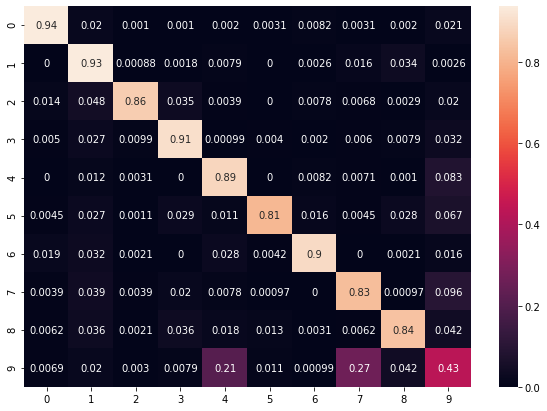

In [12]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(array, index = list(range(10)), columns = list(range(10)))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [11]:
np.mean(result['accuracy'])

0.8852